In [1]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.patches as mpatches

In [2]:
# Summation of the value insde a dictionary
def dictsum(myDict):      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    return sum

In [3]:
# We only care about the country sequence
file = open("/mnt/c/Users/Shiyuan Wang/Desktop/comparison/Total_pop.json", "r")
population2 = file.read()
population2 = json.loads(population2)
Countries = list(population2.keys())
# population
file = open("/mnt/c/Users/Shiyuan Wang/Desktop/new_results/Total_pop_newest.json", "r")
population = file.read()
population = json.loads(population)
population = {k: population[k] for k in Countries}

In [4]:
file = open("../2_Concentration_Factors/total_output.json", "r")
total_output = file.read()
total_output = json.loads(total_output)

file = open("../2_Concentration_Factors/final_demand.json", "r")
final_demand = file.read()
final_demand = json.loads(final_demand)

In [5]:
# per million USD
# EORA is in 1000 USD
for i in Countries:
    total_output[i] = total_output[i] * 1000 
    final_demand[i] = final_demand[i] * 1000 

In [6]:
final_demand['USA']/(10**13)

1.9592997213328263

In [7]:
# total number of deaths caused by country i and happen in country j
file = open("con_mort_tol.json", "r")
con_mort_tol = file.read()
con_mort_tol = json.loads(con_mort_tol)

In [8]:
# total number of deaths caused by country i and happen in country j
file = open("pro_mort_tol.json", "r")
pro_mort_tol = file.read()
pro_mort_tol = json.loads(pro_mort_tol)

In [9]:
# Row sum: total deaths happen in that country
con_total = dict(pd.DataFrame(con_mort_tol).sum(axis = 1))
pro_total = dict(pd.DataFrame(pro_mort_tol).sum(axis = 1))

In [10]:
# Col sum: total deaths caused by that country
con_caused = dict(pd.DataFrame(con_mort_tol).sum(axis = 0))
pro_caused = dict(pd.DataFrame(pro_mort_tol).sum(axis = 0))

In [11]:
# total deaths happen in that country
con_dom_world = {}
for country in con_mort_tol:
    con_dom_world[country] = {}
    con_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_dom_world[country]['world'] = con_total[country]
    con_dom_world[country]['OtherPartofWorld'] = con_dom_world[country]['world'] - con_dom_world[country]['domestic']

In [12]:
# total deaths caused by that country
con_cause_dom_world = {}
for country in con_mort_tol:
    con_cause_dom_world[country] = {}
    con_cause_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_cause_dom_world[country]['world'] = con_caused[country]
    con_cause_dom_world[country]['OtherPartofWorld'] = con_cause_dom_world[country]['world'] - con_cause_dom_world[country]['domestic']

In [13]:
net_export_death = {}

for country in con_cause_dom_world:
    if country != 'ROW':
        net_export_death[country] = (con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld'])

In [14]:
print(sorted(con_total.items(), key=lambda item: item[1],reverse=True)[:6])
print(sorted(con_caused.items(), key=lambda item: item[1],reverse=True)[:5])

[('CHN', 1241848.475484423), ('IND', 576492.7342931574), ('IDN', 169699.42867745517), ('JPN', 106707.94366040881), ('BRA', 92051.51869995154), ('USA', 86781.66618595831)]
[('CHN', 1023410.8300149156), ('IND', 447292.39315022324), ('USA', 230725.6868888209), ('IDN', 157906.31059919845), ('JPN', 124004.26105568584)]


In [15]:
net_export_death_per = {} # per population

for country in con_cause_dom_world:
    if country != 'ROW':
        net_export_val = (con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld'])/(population[country]/10000)
        if net_export_val > 100:
            net_export_death_per[country] = 100
#         elif net_export_val > 100000:
#             net_export_death_per[country] = 100000
        else:
            net_export_death_per[country] = net_export_val

In [16]:
population.pop('ROW')
final_demand.pop('ROW')

0.0

In [19]:
df_shp = gpd.read_file('/mnt/c/Users/Shiyuan Wang/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [20]:
df_shp.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [21]:
df_new = pd.DataFrame({'ADM0_A3': list(net_export_death.keys()),'net_export': list(net_export_death.values()),
                      'population': list(population.values()),'final_demand': list(final_demand.values()),})

In [22]:
df_final = pd.merge(df_new,df_shp,how="left",on=["ADM0_A3"])

In [23]:
df_final = df_final[['ADM0_A3','NAME','net_export','population','final_demand','CONTINENT']]

In [24]:
for i in range(len(df_final)):
    if df_final.loc[i,'ADM0_A3'] == 'PSE':
        df_final.loc[i,'CONTINENT'] == df_shp[df_shp['ADM0_A3']=='PSX']['CONTINENT']

In [25]:
df_final.loc[list(net_export_death.keys()).index('PSE'),'CONTINENT'] = df_shp[df_shp['ADM0_A3']=='PSX']['CONTINENT'].values[0]

In [26]:
df_final.loc[list(net_export_death.keys()).index('SUD'),'CONTINENT'] = df_shp[df_shp['ADM0_A3']=='SDN']['CONTINENT'].values[0]

In [27]:
df_final['CONTINENT']=pd.Categorical(df_final['CONTINENT'])

In [28]:
df_final['CONTINENT_code'] = df_final['CONTINENT'].cat.codes

In [29]:
continent = ['Africa','Asia','Europe','North America','Oceania','Seven seas (open ocean)','South America']

In [30]:
continent2 = {'0':'Africa','1':'Asia','2':'Europe','3':'North America','4':'Oceania','6':'Seven seas (open ocean)','5':'South America'}

In [31]:
df_final[df_final['CONTINENT']=='Seven seas (open ocean)']

,ADM0_A3,NAME,net_export,population,final_demand,CONTINENT,CONTINENT_code
105,MDV,Maldives,201.251746,5.909558e+05,3.374815e+09,Seven seas (open ocean),5
109,MUS,Mauritius,360.984105,1.291254e+06,1.115682e+10,Seven seas (open ocean),5
148,SYC,Seychelles,174.947647,1.051095e+05,1.362116e+09,Seven seas (open ocean),5


In [32]:
# Change seven seas to other
df_final['CONTINENT'] = df_final['CONTINENT'].replace(['Seven seas (open ocean)'], 'Other')

In [33]:
df_final['CONTINENT'].unique()

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Other']
Categories (7, object): ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Other']

In [34]:
df_final['net_export_capita'] = df_final['net_export']/df_final['population']

In [35]:
df_final

,ADM0_A3,NAME,net_export,population,final_demand,CONTINENT,CONTINENT_code,net_export_capita
0,AFG,Afghanistan,437.294550,3.056780e+07,2.447052e+10,Asia,1,0.000014
1,ALB,Albania,-94.854957,2.895460e+06,1.346807e+10,Europe,2,-0.000033
2,DZA,Algeria,3023.901587,4.414247e+07,1.833768e+11,Africa,0,0.000069
3,AND,Andorra,42.552640,1.084263e+05,2.857466e+09,Europe,2,0.000392
4,AGO,Angola,-2665.487484,3.676776e+07,9.788361e+10,Africa,0,-0.000072
...,...,...,...,...,...,...,...,...
182,VEN,Venezuela,14588.784775,3.229033e+07,3.873810e+11,South America,6,0.000452
183,VNM,Vietnam,-21990.234198,9.895143e+07,1.995281e+11,Asia,1,-0.000222
184,YEM,Yemen,-156.568027,3.042738e+07,3.166482e+10,Asia,1,-0.000005
185,ZMB,Zambia,188.927469,1.861695e+07,2.202121e+10,Africa,0,0.000010


In [36]:
df_final.loc[30,'NAME'] = 'Palestine'

In [37]:
# df_final.to_csv('map_continent.csv')

In [38]:
for continent in list(df_final['CONTINENT'].unique()):
    df_continent = df_final[df_final['CONTINENT'] == continent]
    total_number = len(df_continent)
    negative = len(df_continent[df_continent['net_export'] < 0])
    positive = len(df_continent[df_continent['net_export'] >= 0])
    print(continent,'negative',negative/total_number,'positive',positive/total_number)

Asia negative 0.3673469387755102 positive 0.6326530612244898
Europe negative 0.2558139534883721 positive 0.7441860465116279
Africa negative 0.5102040816326531 positive 0.4897959183673469
North America negative 0.2608695652173913 positive 0.7391304347826086
South America negative 0.4166666666666667 positive 0.5833333333333334
Oceania negative 0.0 positive 1.0
Other negative 0.0 positive 1.0


In [39]:
len(df_final[df_final['net_export']>=0])/len(df_final)

0.6524064171122995

-----

## Overall plot

In [40]:
df_final.sort_values(by=['net_export'],ascending=True,inplace=True)
df_final.reset_index(drop=True,inplace=True)

In [41]:
y_low = min(df_final['net_export']/(df_final['population']/1000000))
y_high = max(df_final['net_export']/(df_final['population']/1000000))
y_low, y_high

(-775.2440274365722, 11095.812403721811)

In [42]:
df_final.sort_values(by='net_export_capita')

,ADM0_A3,NAME,net_export,population,final_demand,CONTINENT,CONTINENT_code,net_export_capita
12,BGR,Bulgaria,-6006.958276,7.748474e+06,4.754850e+10,Europe,2,-0.000775
4,ROU,Romania,-16225.407632,3.314418e+07,1.818005e+11,Europe,2,-0.000490
41,SWZ,eSwatini,-519.391904,1.077423e+06,3.963609e+09,Africa,0,-0.000482
26,GEO,Georgia,-1764.249411,3.821296e+06,1.731476e+10,Asia,1,-0.000462
8,PRK,North Korea,-10263.032685,2.322790e+07,1.692489e+10,Asia,1,-0.000442
...,...,...,...,...,...,...,...,...
95,SYC,Seychelles,174.947647,1.051095e+05,1.362116e+09,Other,5,0.001664
173,KWT,Kuwait,11256.121456,3.639123e+06,9.981827e+10,Asia,1,0.003093
106,MCO,Monaco,242.527281,5.770690e+04,6.628647e+09,Europe,2,0.004203
108,LIE,Liechtenstein,250.610284,2.582104e+04,4.910558e+09,Europe,2,0.009706


In [43]:
0.004840 * 1000

4.84

In [44]:
df_final[df_final['CONTINENT'] == 'Other']

,ADM0_A3,NAME,net_export,population,final_demand,CONTINENT,CONTINENT_code,net_export_capita
95,SYC,Seychelles,174.947647,1.051095e+05,1.362116e+09,Other,5,0.001664
98,MDV,Maldives,201.251746,5.909558e+05,3.374815e+09,Other,5,0.000341
114,MUS,Mauritius,360.984105,1.291254e+06,1.115682e+10,Other,5,0.000280


In [45]:
df_final['CONTINENT']

0               Asia
1               Asia
2               Asia
3               Asia
4             Europe
           ...      
182           Europe
183             Asia
184           Europe
185             Asia
186    North America
Name: CONTINENT, Length: 187, dtype: category
Categories (7, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'Other', 'South America']

In [46]:
df_final['final_demand']/df_final['population']

0       7520.006432
1       1537.309263
2       1393.763771
3       2016.424298
4       5485.140859
           ...     
182    35067.355548
183     9985.394269
184    40363.215146
185    17311.116404
186    56740.118516
Length: 187, dtype: float64

In [47]:
df_final

,ADM0_A3,NAME,net_export,population,final_demand,CONTINENT,CONTINENT_code,net_export_capita
0,CHN,China,-218437.645470,1.444650e+09,1.086378e+13,Asia,1,-0.000151
1,IND,India,-129200.341143,1.409461e+09,2.166778e+12,Asia,1,-0.000092
2,BGD,Bangladesh,-35955.472116,1.643983e+08,2.291324e+11,Asia,1,-0.000219
3,VNM,Vietnam,-21990.234198,9.895143e+07,1.995281e+11,Asia,1,-0.000222
4,ROU,Romania,-16225.407632,3.314418e+07,1.818005e+11,Europe,2,-0.000490
...,...,...,...,...,...,...,...,...
182,FRA,France,25222.656626,7.037750e+07,2.467953e+12,Europe,2,0.000358
183,TUR,Turkey,25674.210781,8.119245e+07,8.107386e+11,Asia,1,0.000316
184,GBR,United Kingdom,27933.411575,6.787015e+07,2.739458e+12,Europe,2,0.000412
185,SAU,Saudi Arabia,37645.486365,3.685602e+07,6.380188e+11,Asia,1,0.001021


Text(0.5, 0, 'log(Final demand per capita(dollars))')

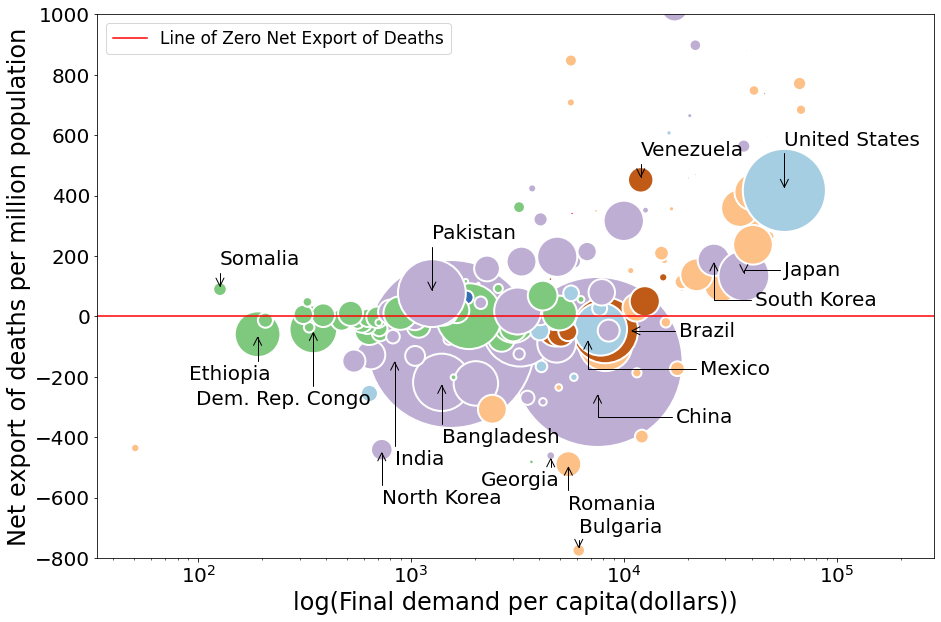

In [52]:
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_final['final_demand']/df_final['population'], 
    y = df_final['net_export']/(df_final['population']/1000000), 
    s=df_final['population']/50000, 
    c=df_final['CONTINENT'].cat.codes, 
    cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(-800,1000)
# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")

plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(loc="upper left",fontsize=17)

   

# CHN
i = 'CHN'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-100),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+10000,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-200),)
 
i = 'USA'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0][:13],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+150),)

i = 'IND'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-700,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-50),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-700,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-400),)
 
i = 'VEN'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-5,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+80),)
 
i = 'SOM'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+80),)
 
i = 'ETH'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-100,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-150),)
 
i = 'COD'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-250,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-250),)
 

i = 'JPN'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+20000,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),)
i = 'KOR'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+15000,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-150),)
i = 'MEX'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0][:13],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-1000,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-30),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+15000,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-150),)
i = 'PAK'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+180),)

i = 'PRK'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-180),)

i = 'BGD'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-200),)
 
i = 'BGR'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+60),)
i = 'ROU'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-150),)
i = 'BRA'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+2400,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+10000,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-20),)


i = 'GEO'
plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-2400,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-100),)

    
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(dollars))",fontsize=24)
# plt.title("")

## Asia

In [49]:
continent = 'Asia'
df_continent = df_final[df_final['CONTINENT'] == continent].reset_index(drop=True)
y_low = min(df_continent['net_export']/(df_continent['population']/1000000))
y_high = max(df_continent['net_export']/(df_continent['population']/1000000))
df_continent = df_continent.sort_values(by='population',ascending=False)
y_low, y_high

(-461.68872029957186, 3093.0866956923783)

In [50]:
annotation_country = []
for i in df_continent['ADM0_A3']:
    if df_continent[df_continent['ADM0_A3']==i]['net_export'].values[0]/(df_continent[df_continent['ADM0_A3']==i]['population'].values[0]/1000000) < 500:
        annotation_country.append(i)

In [49]:
df_continent.sort_values(by='net_export_capita')

,ADM0_A3,NAME,net_export,population,final_demand,CONTINENT,CONTINENT_code,net_export_capita
11,GEO,Georgia,-1764.249411,3.821296e+06,1.731476e+10,Asia,1,-0.000462
5,PRK,North Korea,-10263.032685,2.322790e+07,1.692489e+10,Asia,1,-0.000442
13,ARM,Armenia,-792.429478,2.796982e+06,1.165155e+10,Asia,1,-0.000283
9,AZE,Azerbaijan,-2704.191473,1.002162e+07,3.528375e+10,Asia,1,-0.000270
3,VNM,Vietnam,-21990.234198,9.895143e+07,1.995281e+11,Asia,1,-0.000222
2,BGD,Bangladesh,-35955.472116,1.643983e+08,2.291324e+11,Asia,1,-0.000219
0,CHN,China,-218437.645470,1.444650e+09,1.086378e+13,Asia,1,-0.000151
8,SYR,Syria,-3952.283694,2.666357e+07,1.436735e+10,Asia,1,-0.000148
10,KHM,Cambodia,-2590.383177,1.974655e+07,2.063544e+10,Asia,1,-0.000131
7,NPL,Nepal,-5344.940553,4.182153e+07,2.706628e+10,Asia,1,-0.000128


Text(0.5, 0, 'log(Final demand per capita(dollars))')

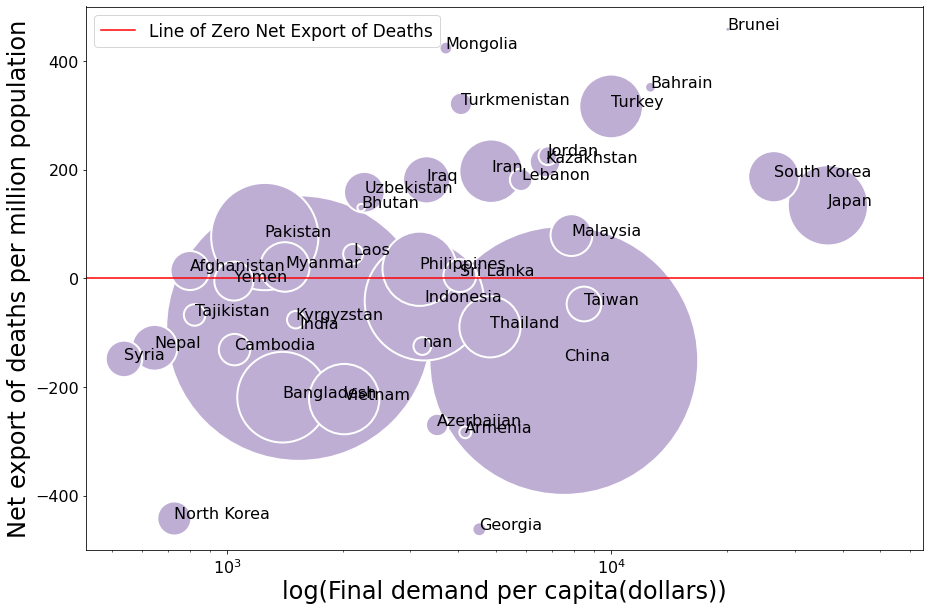

In [50]:
# color_map = {'Africa':"#7fc97f",'Asia':"#beaed4",'Europe':"#fdc086",'North America':"#a6cee3",'Oceania':"#386cb0",'Seven seas (open ocean)':"#f0027f",'South America':"#bf5b17"}
continent = 'Asia'
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_continent['final_demand']/df_continent['population'], 
    y = df_continent['net_export']/(df_continent['population']/1000000), 
    s=df_continent['population']/20000, 
    c='#beaed4',
#     c=df_continent['CONTINENT'].cat.codes, 
#     cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(-500,500)
# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")


for i in annotation_country:
    plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=16,
#              arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),)

    

plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(loc="upper left",fontsize=17)
   
    
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(dollars))",fontsize=24)
# plt.title("")

## North America

In [48]:
continent = 'North America'
df_continent = df_final[df_final['CONTINENT'] == continent].reset_index(drop=True)
df_continent = df_continent.sort_values(by='population',ascending=False)
y_low = min(df_continent['net_export']/(df_continent['population']/1000000))
y_high = max(df_continent['net_export']/(df_continent['population']/1000000))
y_low, y_high

(-255.4208921821125, 1593.6064557347997)

In [49]:
annotation_country = []
for i in df_continent['ADM0_A3']:
    if df_continent[df_continent['ADM0_A3']==i]['net_export'].values[0]/(df_continent[df_continent['ADM0_A3']==i]['population'].values[0]/1000000) < 500:
        annotation_country.append(i)

Text(0.5, 0, 'log(Final demand per capita(million dollars))')

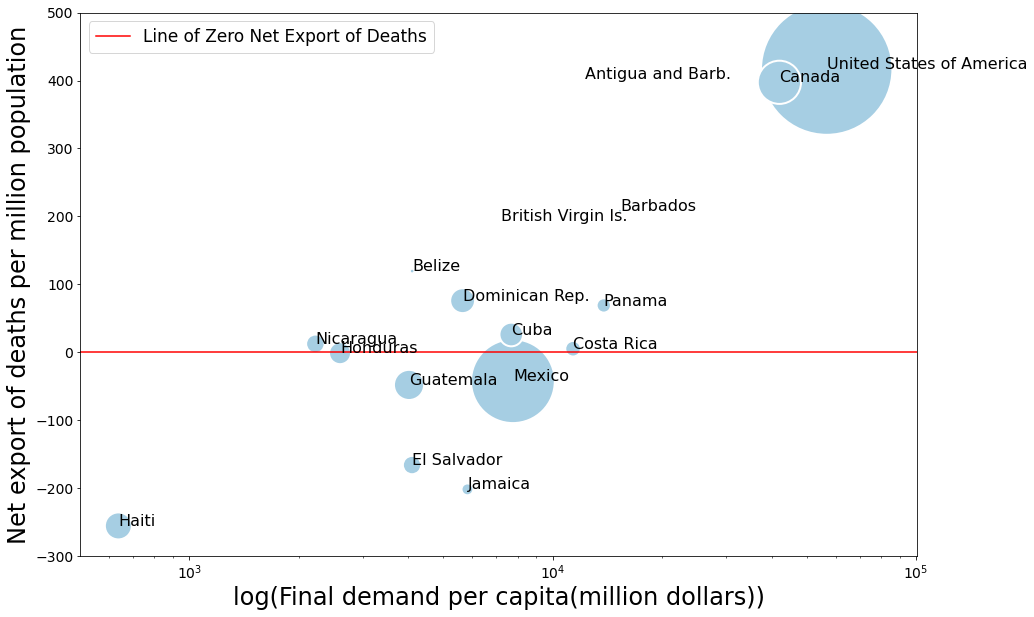

In [50]:
# color_map = {'Africa':"#7fc97f",'Asia':"#beaed4",'Europe':"#fdc086",'North America':"#a6cee3",'Oceania':"#386cb0",'Seven seas (open ocean)':"#f0027f",'South America':"#bf5b17"}
continent = 'North America'
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_continent['final_demand']/df_continent['population'], 
    y = df_continent['net_export']/(df_continent['population']/1000000), 
    s=df_continent['population']/20000, 
    c='#a6cee3',
#     c=df_continent['CONTINENT'].cat.codes, 
#     cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(-300,500)
# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")


for i in annotation_country:
    plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=16,
#              arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),)

    

plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(loc="upper left",fontsize=17)
   
    
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(dollars))",fontsize=24)
# plt.title("")

## South America

In [51]:
continent = 'South America'
df_continent = df_final[df_final['CONTINENT'] == continent].reset_index(drop=True)
y_low = min(df_continent['net_export']/(df_continent['population']/1000000))
y_high = max(df_continent['net_export']/(df_continent['population']/1000000))
df_continent = df_continent.sort_values(by='population',ascending=False)
y_low, y_high

(-55.959876976558824, 1324.5860595301972)

In [52]:
annotation_country = []
for i in df_continent['ADM0_A3']:
    if df_continent[df_continent['ADM0_A3']==i]['net_export'].values[0]/(df_continent[df_continent['ADM0_A3']==i]['population'].values[0]/1000000) < 300:
        annotation_country.append(i)

Text(0.5, 0, 'log(Final demand per capita(million dollars))')

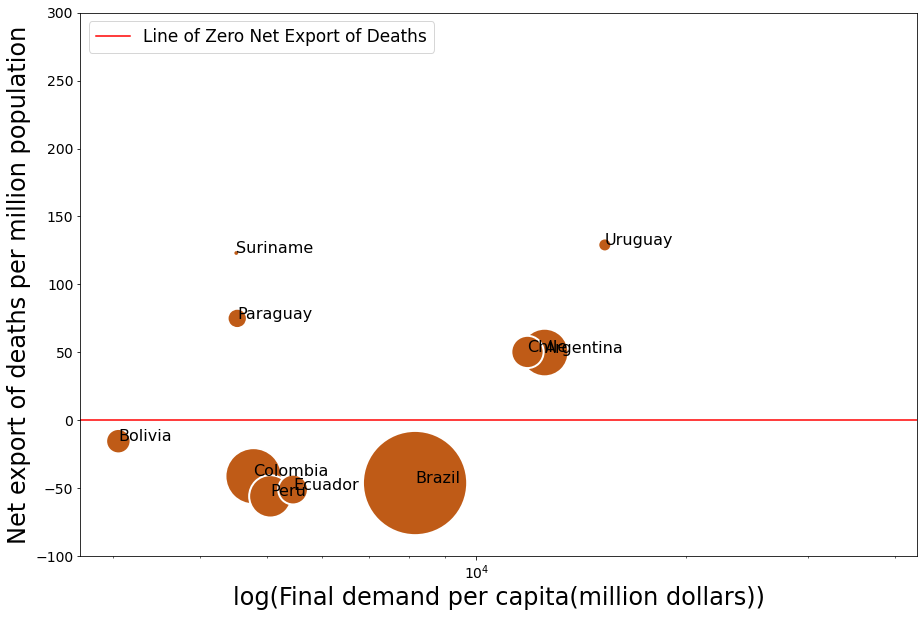

In [53]:
# color_map = {'Africa':"#7fc97f",'Asia':"#beaed4",'Europe':"#fdc086",'North America':"#a6cee3",'Oceania':"#386cb0",'Seven seas (open ocean)':"#f0027f",'South America':"#bf5b17"}
continent = 'South America'
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_continent['final_demand']/df_continent['population'], 
    y = df_continent['net_export']/(df_continent['population']/1000000), 
    s=df_continent['population']/20000, 
    c='#bf5b17',
#     c=df_continent['CONTINENT'].cat.codes, 
#     cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(-100,300)
# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")


for i in annotation_country:
    plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=16,
#              arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),)

    

plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(loc="upper left",fontsize=17)
   
    
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(dollars))",fontsize=24)
# plt.title("")

## Africa

In [89]:
continent = 'Africa'
df_continent = df_final[df_final['CONTINENT'] == continent].reset_index(drop=True)
y_low = min(df_continent['net_export']/(df_continent['population']/1000000))
y_high = max(df_continent['net_export']/(df_continent['population']/1000000))
df_continent = df_continent.sort_values(by='population',ascending=False)
y_low, y_high

(-482.0687179076041, 361.4297914021473)

In [90]:
annotation_country = []
for i in df_continent['ADM0_A3']:
    if df_continent[df_continent['ADM0_A3']==i]['net_export'].values[0]/(df_continent[df_continent['ADM0_A3']==i]['population'].values[0]/1000000) < 450:
        annotation_country.append(i)

Text(0.5, 0, 'log(Final demand per capita(million dollars))')

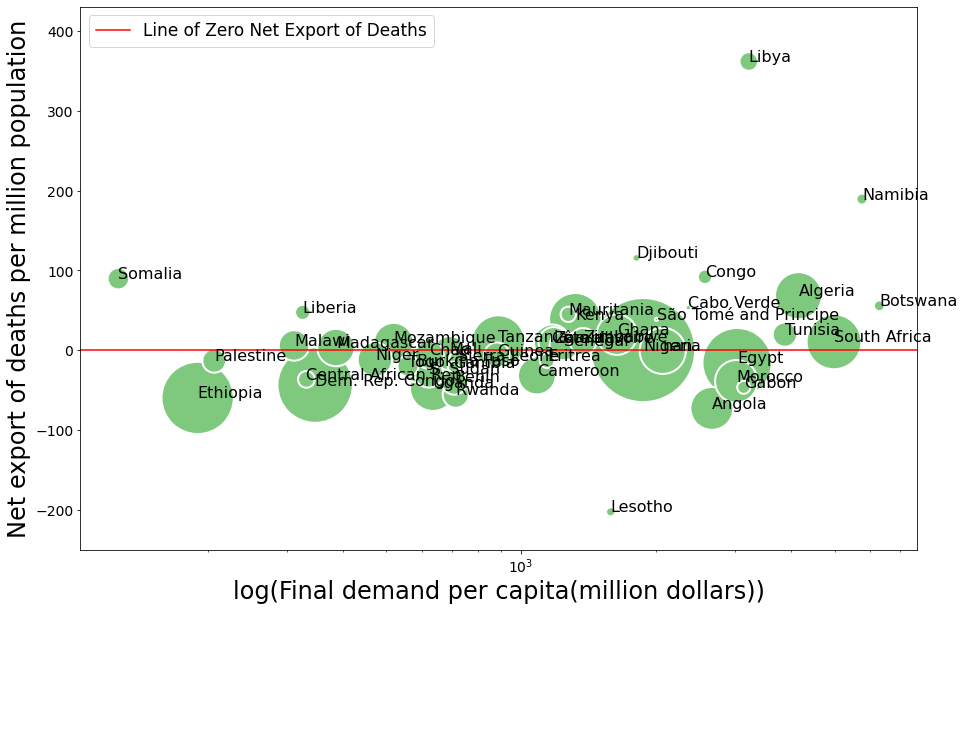

In [91]:
# color_map = {'Africa':"#7fc97f",'Asia':"#beaed4",'Europe':"#fdc086",'North America':"#a6cee3",'Oceania':"#386cb0",'Seven seas (open ocean)':"#f0027f",'South America':"#bf5b17"}
continent = 'Africa'
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_continent['final_demand']/df_continent['population'], 
    y = df_continent['net_export']/(df_continent['population']/1000000), 
    s=df_continent['population']/20000, 
    c='#7fc97f',
#     c=df_continent['CONTINENT'].cat.codes, 
#     cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(-250,430)
# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")


for i in annotation_country:
    plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=16,
#              arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),)

    

plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(loc="upper left",fontsize=17)
   
    
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(dollars))",fontsize=24)
# plt.title("")

## Europe

In [57]:
continent = 'Europe'
df_continent = df_final[df_final['CONTINENT'] == continent].reset_index(drop=True)
y_low = min(df_continent['net_export']/(df_continent['population']/1000000))
y_high = max(df_continent['net_export']/(df_continent['population']/1000000))
df_continent = df_continent.sort_values(by='population',ascending=False)
y_low, y_high

(-775.2440274365722, 11095.812403721811)

In [58]:
annotation_country = []
for i in df_continent['ADM0_A3']:
    if df_continent[df_continent['ADM0_A3']==i]['net_export'].values[0]/(df_continent[df_continent['ADM0_A3']==i]['population'].values[0]/1000000) < 1000:
        annotation_country.append(i)

Text(0.5, 0, 'log(Final demand per capita(million dollars))')

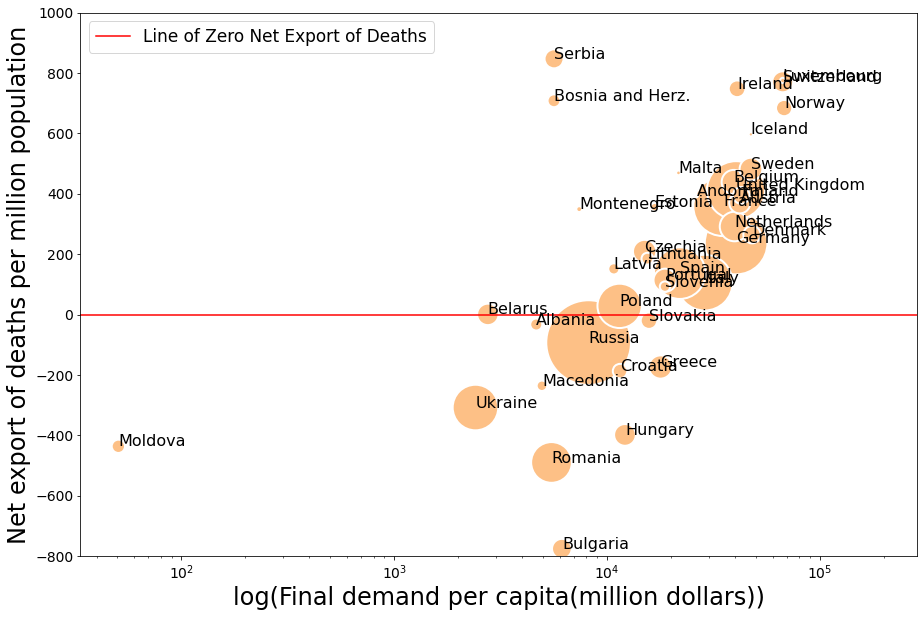

In [59]:
# color_map = {'Africa':"#7fc97f",'Asia':"#beaed4",'Europe':"#fdc086",'North America':"#a6cee3",'Oceania':"#386cb0",'Seven seas (open ocean)':"#f0027f",'South America':"#bf5b17"}
continent = 'Africa'
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_continent['final_demand']/df_continent['population'], 
    y = df_continent['net_export']/(df_continent['population']/1000000), 
    s=df_continent['population']/20000, 
    c='#fdc086',
#     c=df_continent['CONTINENT'].cat.codes, 
#     cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(-800,1000)

# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")


for i in annotation_country:
    plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=16,
#              arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),)

    

plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(loc="upper left",fontsize=17)
   
    
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(dollars))",fontsize=24)
# plt.title("")

## Oceania

In [60]:
continent = 'Oceania'
df_continent = df_final[df_final['CONTINENT'] == continent].reset_index(drop=True)
y_low = min(df_continent['net_export']/(df_continent['population']/1000000))
y_high = max(df_continent['net_export']/(df_continent['population']/1000000))
df_continent = df_continent.sort_values(by='population',ascending=False)
y_low, y_high

(62.400533406092194, 881.0542736425206)

In [61]:
annotation_country = []
for i in df_continent['ADM0_A3']:
    if df_continent[df_continent['ADM0_A3']==i]['net_export'].values[0]/(df_continent[df_continent['ADM0_A3']==i]['population'].values[0]/1000000) < 1000:
        annotation_country.append(i)

Text(0.5, 0, 'log(Final demand per capita(million dollars))')

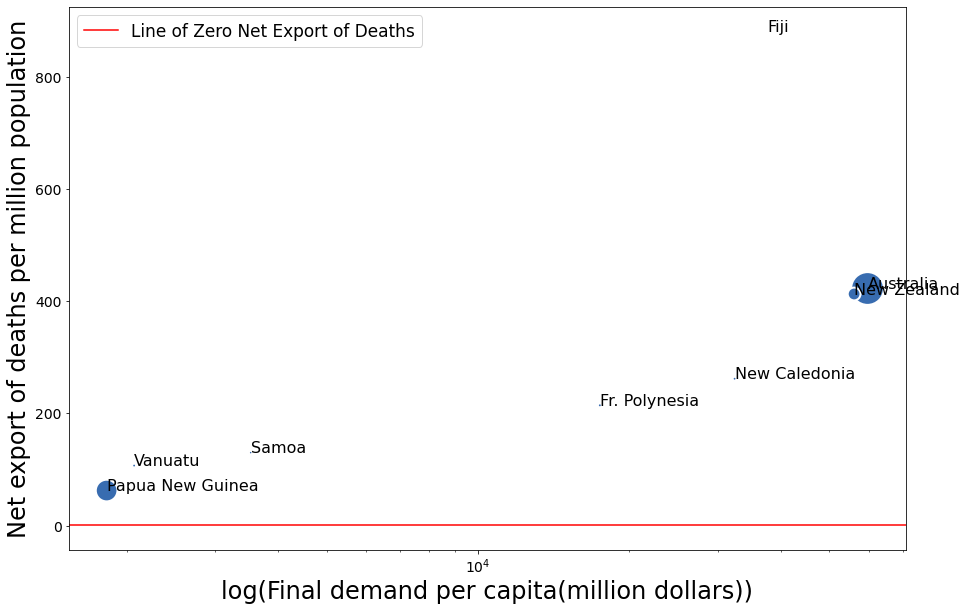

In [62]:
# color_map = {'Africa':"#7fc97f",'Asia':"#beaed4",'Europe':"#fdc086",'North America':"#a6cee3",'Oceania':"#386cb0",'Seven seas (open ocean)':"#f0027f",'South America':"#bf5b17"}
continent = 'Africa'
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_continent['final_demand']/df_continent['population'], 
    y = df_continent['net_export']/(df_continent['population']/1000000), 
    s=df_continent['population']/20000, 
    c='#386cb0',
#     c=df_continent['CONTINENT'].cat.codes, 
#     cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

# plt.ylim(-800,1000)

# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")


for i in annotation_country:
    plt.annotate(df_final[df_final['ADM0_A3']==i]['NAME'].values[0],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=16,
#              arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),)

    

plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(loc="upper left",fontsize=17)
   
    
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(dollars))",fontsize=24)
# plt.title("")